# `scatter` 플롯

이 노트북은 `shap.plots.scatter` 함수를 사용하는 방법을 보여주기 위해(그리고 문서화하기 위해) 고안되었습니다.

In [1]:
import xgboost
import shap
import sklearn.linear_model
import sklearn.neural_network

#  XGBoost 모델 훈련
X,y = shap.datasets.adult()
#model = xgboost.XGBClassifier(max_depth=1).fit(X, y)
#model = sklearn.linear_model.RidgeClassifier().fit(X,y)
model = sklearn.neural_network.MLPClassifier().fit(X,y)


#  SHAP 값 계산
explainer = shap.Explainer(lambda x: model.predict_log_proba(x)[:,1], X)
shap_values = explainer(X[:1000])

divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero

## 단순 종속성  scatter 플롯

종속성 분산형 차트는 단일 피처가 모델의 예측에 미치는 영향을 보여줍니다. 이 예에서는 20세에서 40세 사이에 5만 달러 이상의 수익이 발생할 확률이 크게 증가합니다.

- 각 점은 데이터 집합의 단일 예측(행)입니다.
- x축은 특징의 값입니다(`shap_values.data`에 저장된 X 행렬에서 가져옴).
- y축은 해당 피처의 SHAP 값(`shap_values.values`에 저장됨)으로, 해당 피처의 값을 알면 해당 샘플의 예측에 대한 모델의 출력이 얼마나 변경되는지를 나타냅니다. 이 모델의 경우 단위는 연간 5만 달러 이상의 수익에 대한 로그 확률입니다.
- 플롯 하단의 연한 회색 영역은 데이터 값의 분포를 보여주는 히스토그램입니다.

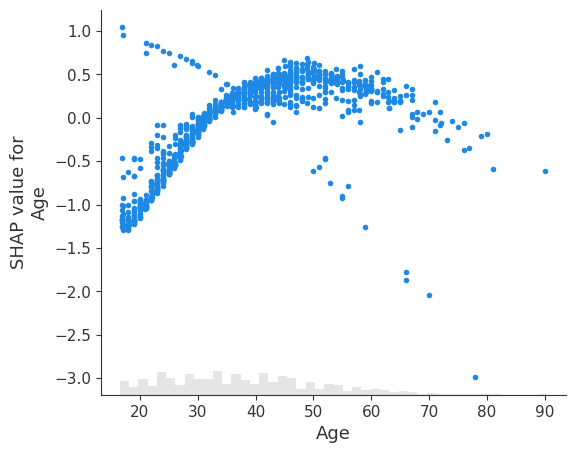

In [2]:
# '나이' 기능에 해당하는 shap_values 설명의 열을 잘라내고 있다는 점에 유의하세요.
shap.plots.scatter(shap_values[:,"Age"])

## 색상을 사용하여 상호작용 효과 강조하기

위 플롯의 수직 분산은 연령 기능의 동일한 값이 사람에 따라 모델의 출력에 다른 영향을 미칠 수 있음을 보여줍니다. 이는 모델에서 나이와 다른 특징 사이에 비선형 상호 작용 효과가 있음을 의미합니다(그렇지 않으면 분산형 차트는 `shap.plots.partial_dependence`에 의해 주어진 선을 완벽하게 따라야 합니다).

이러한 상호 작용 효과를 유발하는 피처를 표시하기 위해 다른 피처로 연령 의존도 분산형 차트의 색상을 지정할 수 있습니다. 전체 설명 개체를 색상 매개변수에 전달하면 산점도는 연령과 가장 강력한 상호 작용을 하는 특징 열을 선택하려고 시도합니다. 이 다른 피처와 플롯 중인 피처 사이에 상호 작용 효과가 있는 경우 뚜렷한 세로 패턴의 색상으로 표시됩니다. 아래 예에서 교육 수준이 높은 20대는 교육 수준이 낮은 20대에 비해 \\$50,000 이상을 벌 가능성이 낮습니다. 이는 교육 수준과 연령 간의 상호 작용 효과를 나타냅니다.

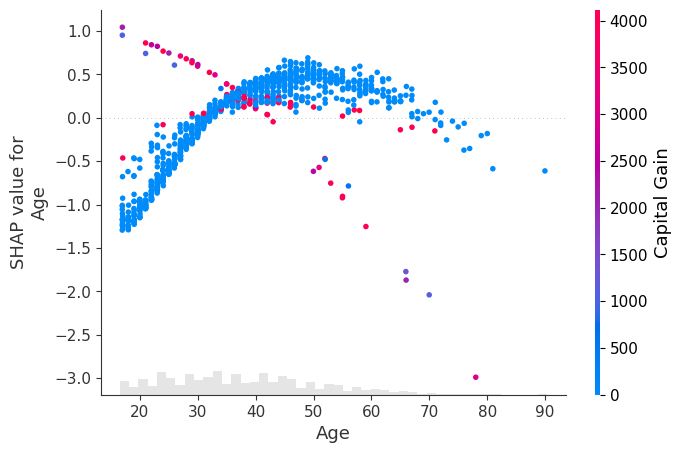

In [3]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

색상에 사용되는 기능을 명시적으로 제어하려면 특정 기능 열을 `color` 매개 변수에 전달하면 됩니다.

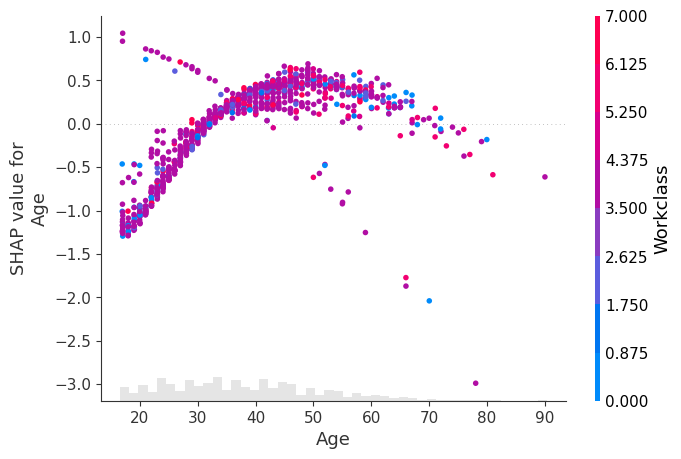

In [4]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:,"Workclass"])

위의 플롯에서 워크클래스 특성이 XGBoost 모델을 위해 숫자로 인코딩된 것을 볼 수 있습니다. 하지만 플롯을 그릴 때는 범주형으로 인코딩되기 전의 원래 문자열 값을 사용하는 경우가 많습니다. 이를 위해 설명 객체의 `.display_data` 속성을 플롯에 표시하려는 데이터의 병렬 버전으로 설정할 수 있습니다.

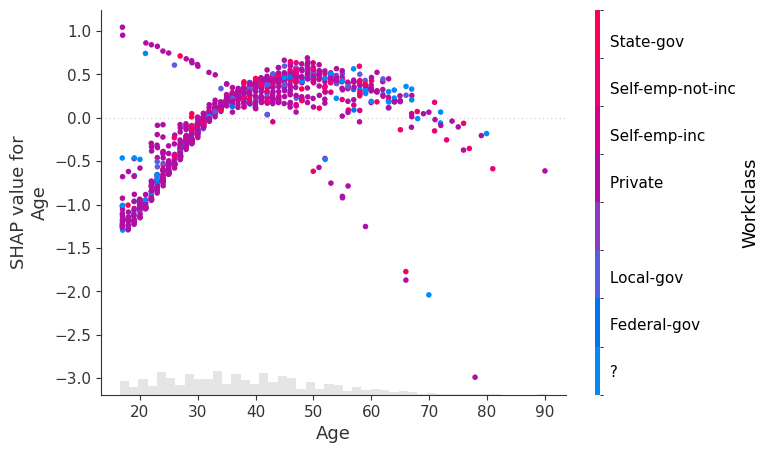

In [5]:
X_display,y = shap.datasets.adult(display=True)
shap_values.display_data = X_display.values

shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:,"Workclass"])

## 글로벌 기능 중요도 순서 사용

플롯하려는 특징의 이름이나 인덱스를 모를 때 가장 중요한 특징만 플롯하고 싶을 때가 있습니다. 이를 위해 설명 개체의 도트 체인 기능을 사용하여 전역 피처 중요도 측정값을 계산하고, 해당 측정값을 기준으로 정렬(내림차순)한 다음, 최상위 특징(이 경우 나이)을 선택할 수 있습니다:

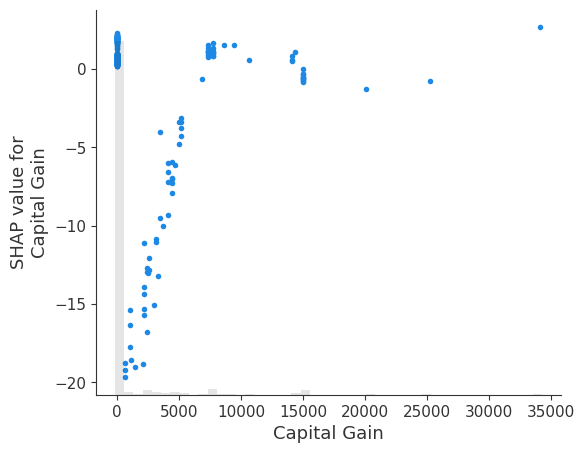

In [6]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])

특징의 글로벌 중요도를 측정하는 방법은 순위에 영향을 미칩니다. 이 예에서 나이는 전체 데이터 집합의 평균 절대값이 가장 큰 특징이지만, 자본 이득은 모든 샘플에서 절대 영향력이 가장 큰 특징입니다.

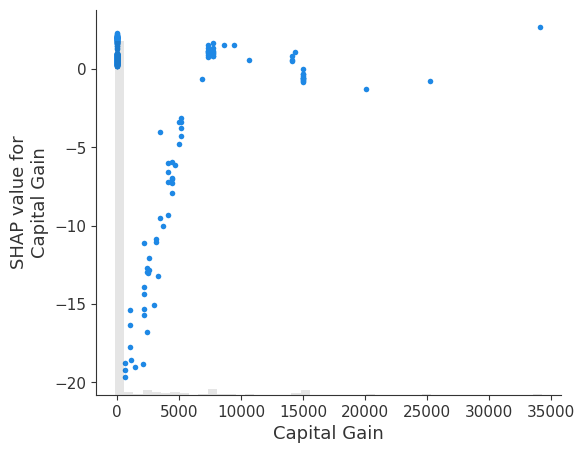

In [8]:
shap.plots.scatter(shap_values[:, shap_values.abs.max(0).argsort[-1]])

최대 함수는 이상값에 민감할 수 있습니다. 보다 강력한 옵션은 백분위수 함수를 사용하는 것입니다. 여기에서는 95번째 백분위수 절대값을 기준으로 기능을 정렬하고 자본 이득이 95번째 백분위수 값이 가장 큰 것을 찾습니다:

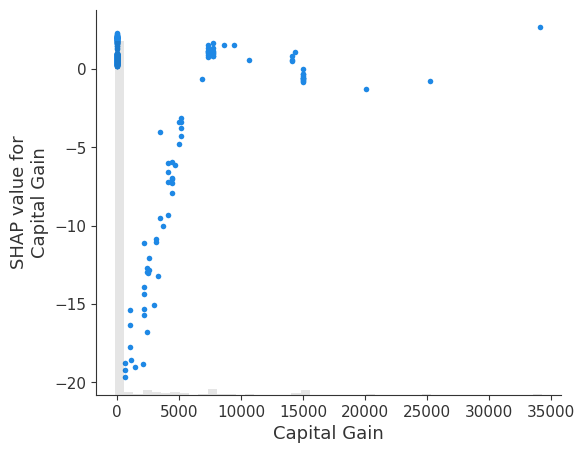

In [9]:
shap.plots.scatter(shap_values[:, shap_values.abs.percentile(95, 0).argsort[-1]])

## 다양한 인터랙션 컬러링 살펴보기

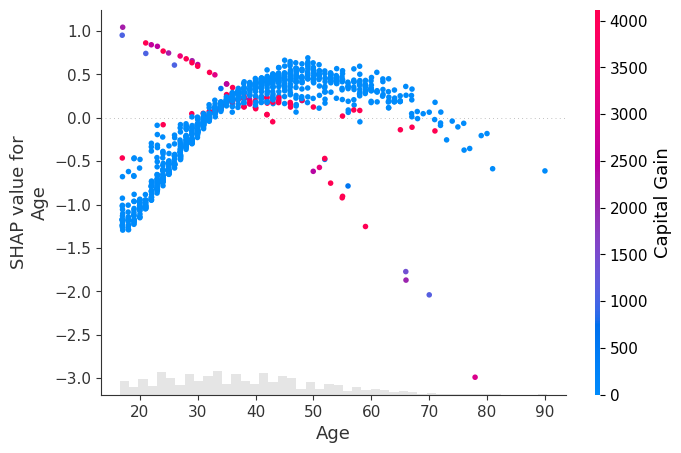

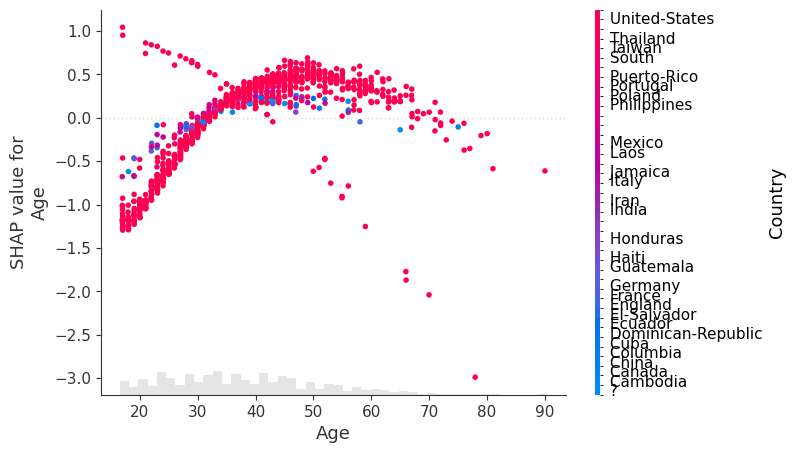

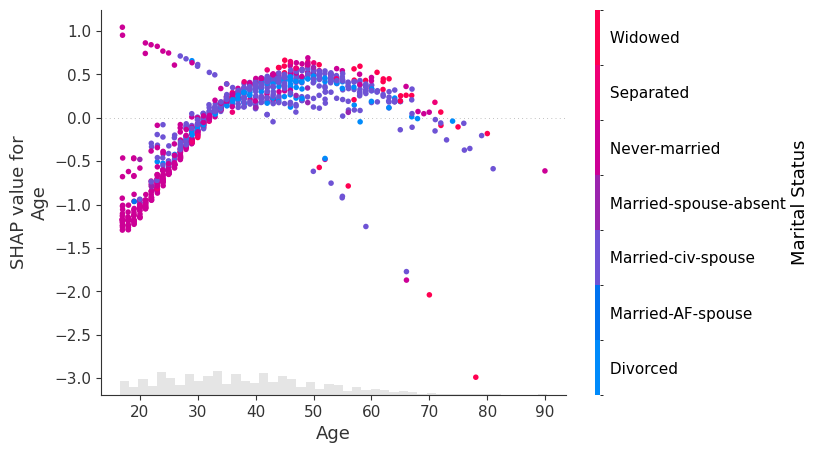

In [10]:
# shap.approximate_interactions를 사용하여 나이와 상호작용할 수 있는 특징을 추측할 수 있습니다.
inds = shap.utils.potential_interactions(shap_values[:, "Age"], shap_values)

# 가능한 상위 세 가지 상호 작용하는 기능 각각에 색상을 지정하여 플롯을 만듭니다.
for i in range(3):
    shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,inds[i]])

## 사용자 지정 figure 속성

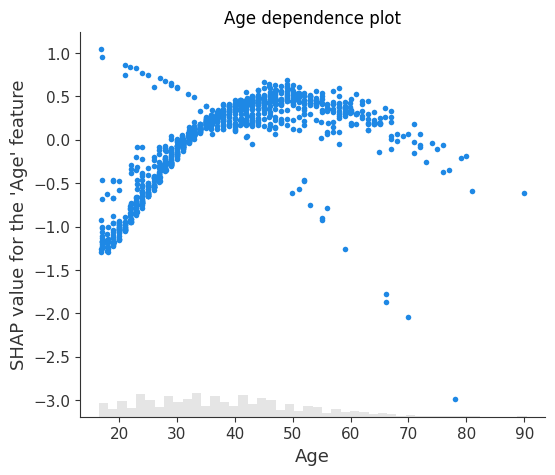

In [12]:
# show=False를 전달하면 shap.dependence_plot이 matplotlib show() 함수를 호출하지 못하도록 할 수 있으므로 
# 결국 show를 직접 호출하기 전에 플롯을 계속 사용자 정의할 수 있습니다.
import matplotlib.pyplot as plt
shap.plots.scatter(shap_values[:,"Age"], show=False)
plt.title("Age dependence plot")
plt.ylabel("SHAP value for the 'Age' feature")
# plt.savefig("my_dependence_plot.pdf") # 원하는 경우 그림의 PDF를 저장할 수 있습니다.
plt.show()

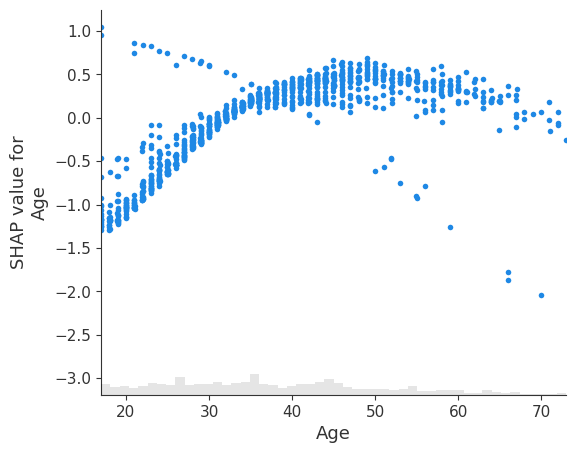

In [13]:
# 백분위수 표기법과 함께 xmax 및 xmin을 사용하여 이상값을 숨길 수 있습니다. 
#. percentile 메서드는 설명 개체의 .values 및 .data 속성 모두에 적용되며, 분산형 차트는 xmin 또는 xmax 인수로 전달될 때 .data 속성을 사용하도록 인식합니다..
age = shap_values[:,"Age"]
shap.plots.scatter(age, xmin=age.percentile(1), xmax=age.percentile(99))

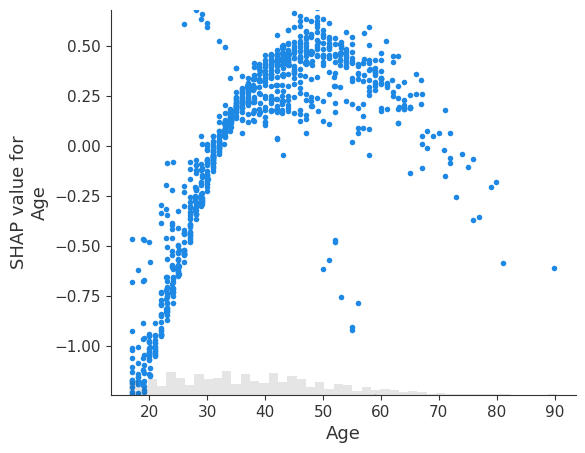

In [14]:
# 백분위수 표기법과 함께 ymax 및 ymin을 사용하여 수직 이상값을 숨길 수 있습니다. 
# 이제 분산형 차트는 .value 속성을 ymin 및 ymax에 사용합니다.  
# 설명 개체가 전달되면 .value 속성을 사용합니다.
age = shap_values[:,"Age"]
shap.plots.scatter(age, ymin=age.percentile(1), ymax=age.percentile(99))

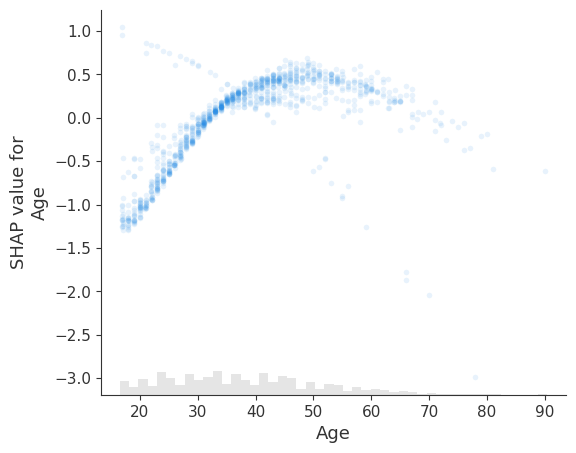

In [15]:
# 투명도를 통해 분산형 차트의 밀집된 영역과 희박한 영역을 구분할 수 있습니다.
shap.plots.scatter(shap_values[:,"Age"], alpha=0.1)

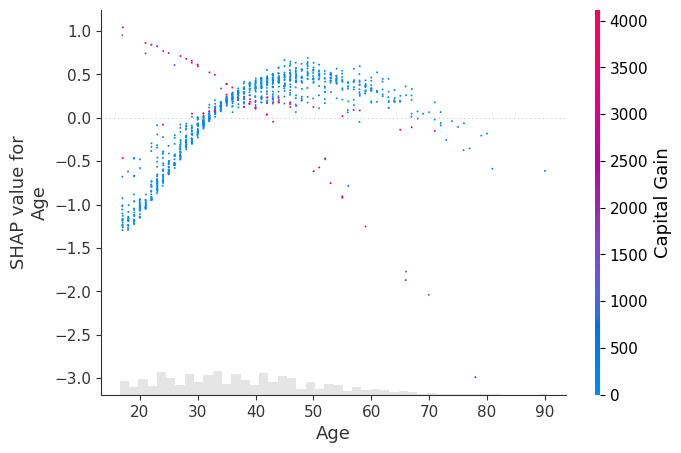

In [16]:
# 투명도를 통해 분산형 차트의 밀집된 영역과 희박한 영역을 구분할 수 있습니다.
shap.plots.scatter(shap_values[:,"Age"], dot_size=2, color=shap_values)

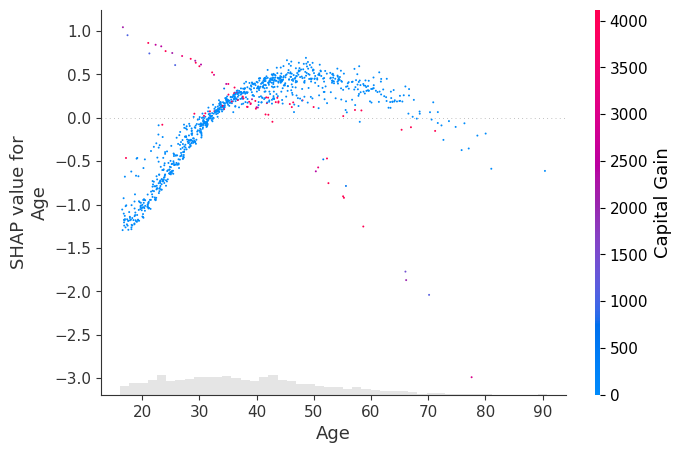

In [17]:
# 범주형(또는 구간차원) 데이터의 경우 소량의 x-jitter 를 추가하면 얇은 점 열의 가독성을 높입니다.
shap.plots.scatter(shap_values[:,"Age"], dot_size=2, x_jitter=1, color=shap_values)

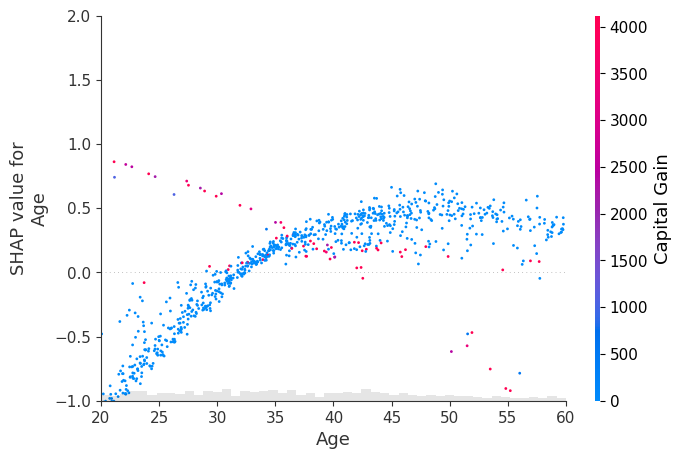

In [18]:
shap.plots.scatter(shap_values[:,"Age"], dot_size=4, x_jitter=1, color=shap_values, xmin=20, xmax=60, ymin=-1, ymax=2)

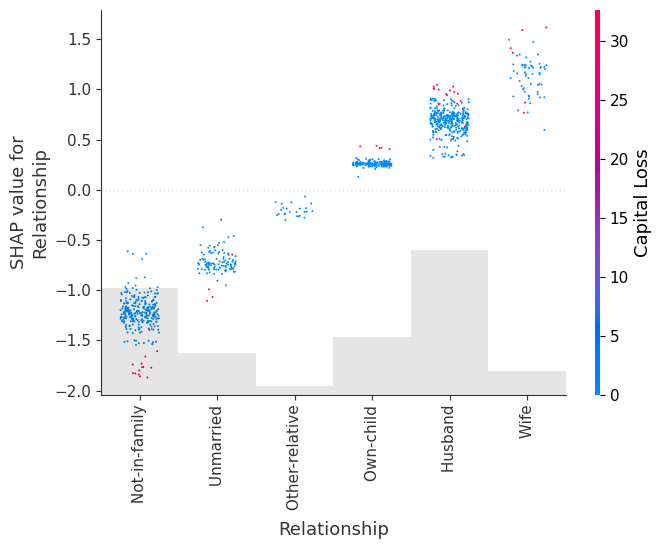

In [19]:
# 범주형(또는 구간차원) 데이터의 경우 소량의 x-jitter를 추가하면 얇은 점 열의 가독성을 높입니다.
shap.plots.scatter(shap_values[:,"Relationship"], dot_size=2, x_jitter=0.5, color=shap_values)

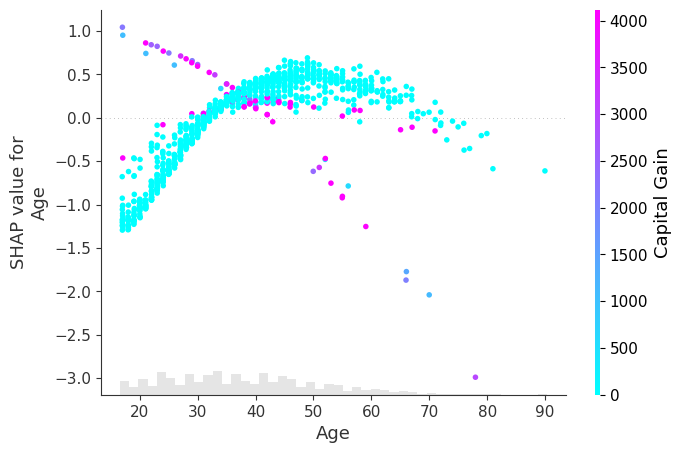

In [20]:
import matplotlib.pyplot as plt

# cmap 매개변수를 사용하여 사용자 지정 색상 맵을 제공할 수 있습니다.
shap.plots.scatter(shap_values[:,"Age"], color=shap_values, cmap=plt.get_cmap("cool"))

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 